# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

## Задание №1.

### A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def metrics_c(actual, pred):
  return {
    'Accuracy': accuracy_score(actual, pred),
    'Precision': precision_score(actual, pred),
    'Recall': recall_score(actual, pred),
    'F1-score': f1_score(actual, pred),
    'ROC_AUC': roc_auc_score(actual, pred)
  }
models_c = {}

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def metrics_r(actual, pred):
  return {
    'MAE': mean_absolute_error(actual, pred),
    'MSE': mean_squared_error(actual, pred),
    'RMSE': sqrt(mean_squared_error(actual, pred)),
    'MAPE': mean_absolute_percentage_error(actual, pred),
    'R^2': r2_score(actual, pred)
  }
models_r = {}

In [4]:
def best_model(models, metrics):
    return max([(val[metrics], k) for k, val in models.items()])

In [5]:
dfc = pd.read_csv('../data/neo_task_upd.csv')
yc = dfc['hazardous']
Xc = dfc.drop(['hazardous'], axis=1)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
Xc, yc = smote.fit_resample(Xc, yc)

In [7]:
dfr = pd.read_csv('../data/energy_task_upd.csv', parse_dates=['date']).set_index('date')
yr = dfr['Appliances']
Xr = dfr.drop(['Appliances'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
Xc_train = mm_scaler.fit_transform(Xc_train)
Xc_test = mm_scaler.transform(Xc_test)

In [10]:
'''
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
Xr_train = s_scaler.fit_transform(Xr_train)
Xr_test = s_scaler.transform(Xr_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\ns_scaler = StandardScaler()\nXr_train = s_scaler.fit_transform(Xr_train)\nXr_test = s_scaler.transform(Xr_test)\n'

In [11]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
from matplotlib import pyplot as plt

In [12]:
parameters = {'criterion': ('gini', 'entropy', 'log_loss')}
optimal = GridSearchCV(DecisionTreeClassifier(max_depth=3), parameters).fit(Xc_train, yc_train)
# выводим оптимальные значения параметров
criterion = optimal.best_params_['criterion']

criterion

'gini'

In [13]:
DTC = DecisionTreeClassifier(criterion=criterion, max_depth=3).fit(Xc_train, yc_train)
yc_pred = DTC.predict(Xc_test)

print(tree.export_text(DTC))

|--- feature_1 <= 0.32
|   |--- feature_0 <= 0.31
|   |   |--- feature_1 <= 0.29
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.29
|   |   |   |--- class: 0
|   |--- feature_0 >  0.31
|   |   |--- feature_3 <= 0.24
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.24
|   |   |   |--- class: 0
|--- feature_1 >  0.32
|   |--- feature_0 <= 1.00
|   |   |--- feature_2 <= 0.17
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.17
|   |   |   |--- class: 1
|   |--- feature_0 >  1.00
|   |   |--- feature_3 <= 0.16
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.16
|   |   |   |--- class: 0



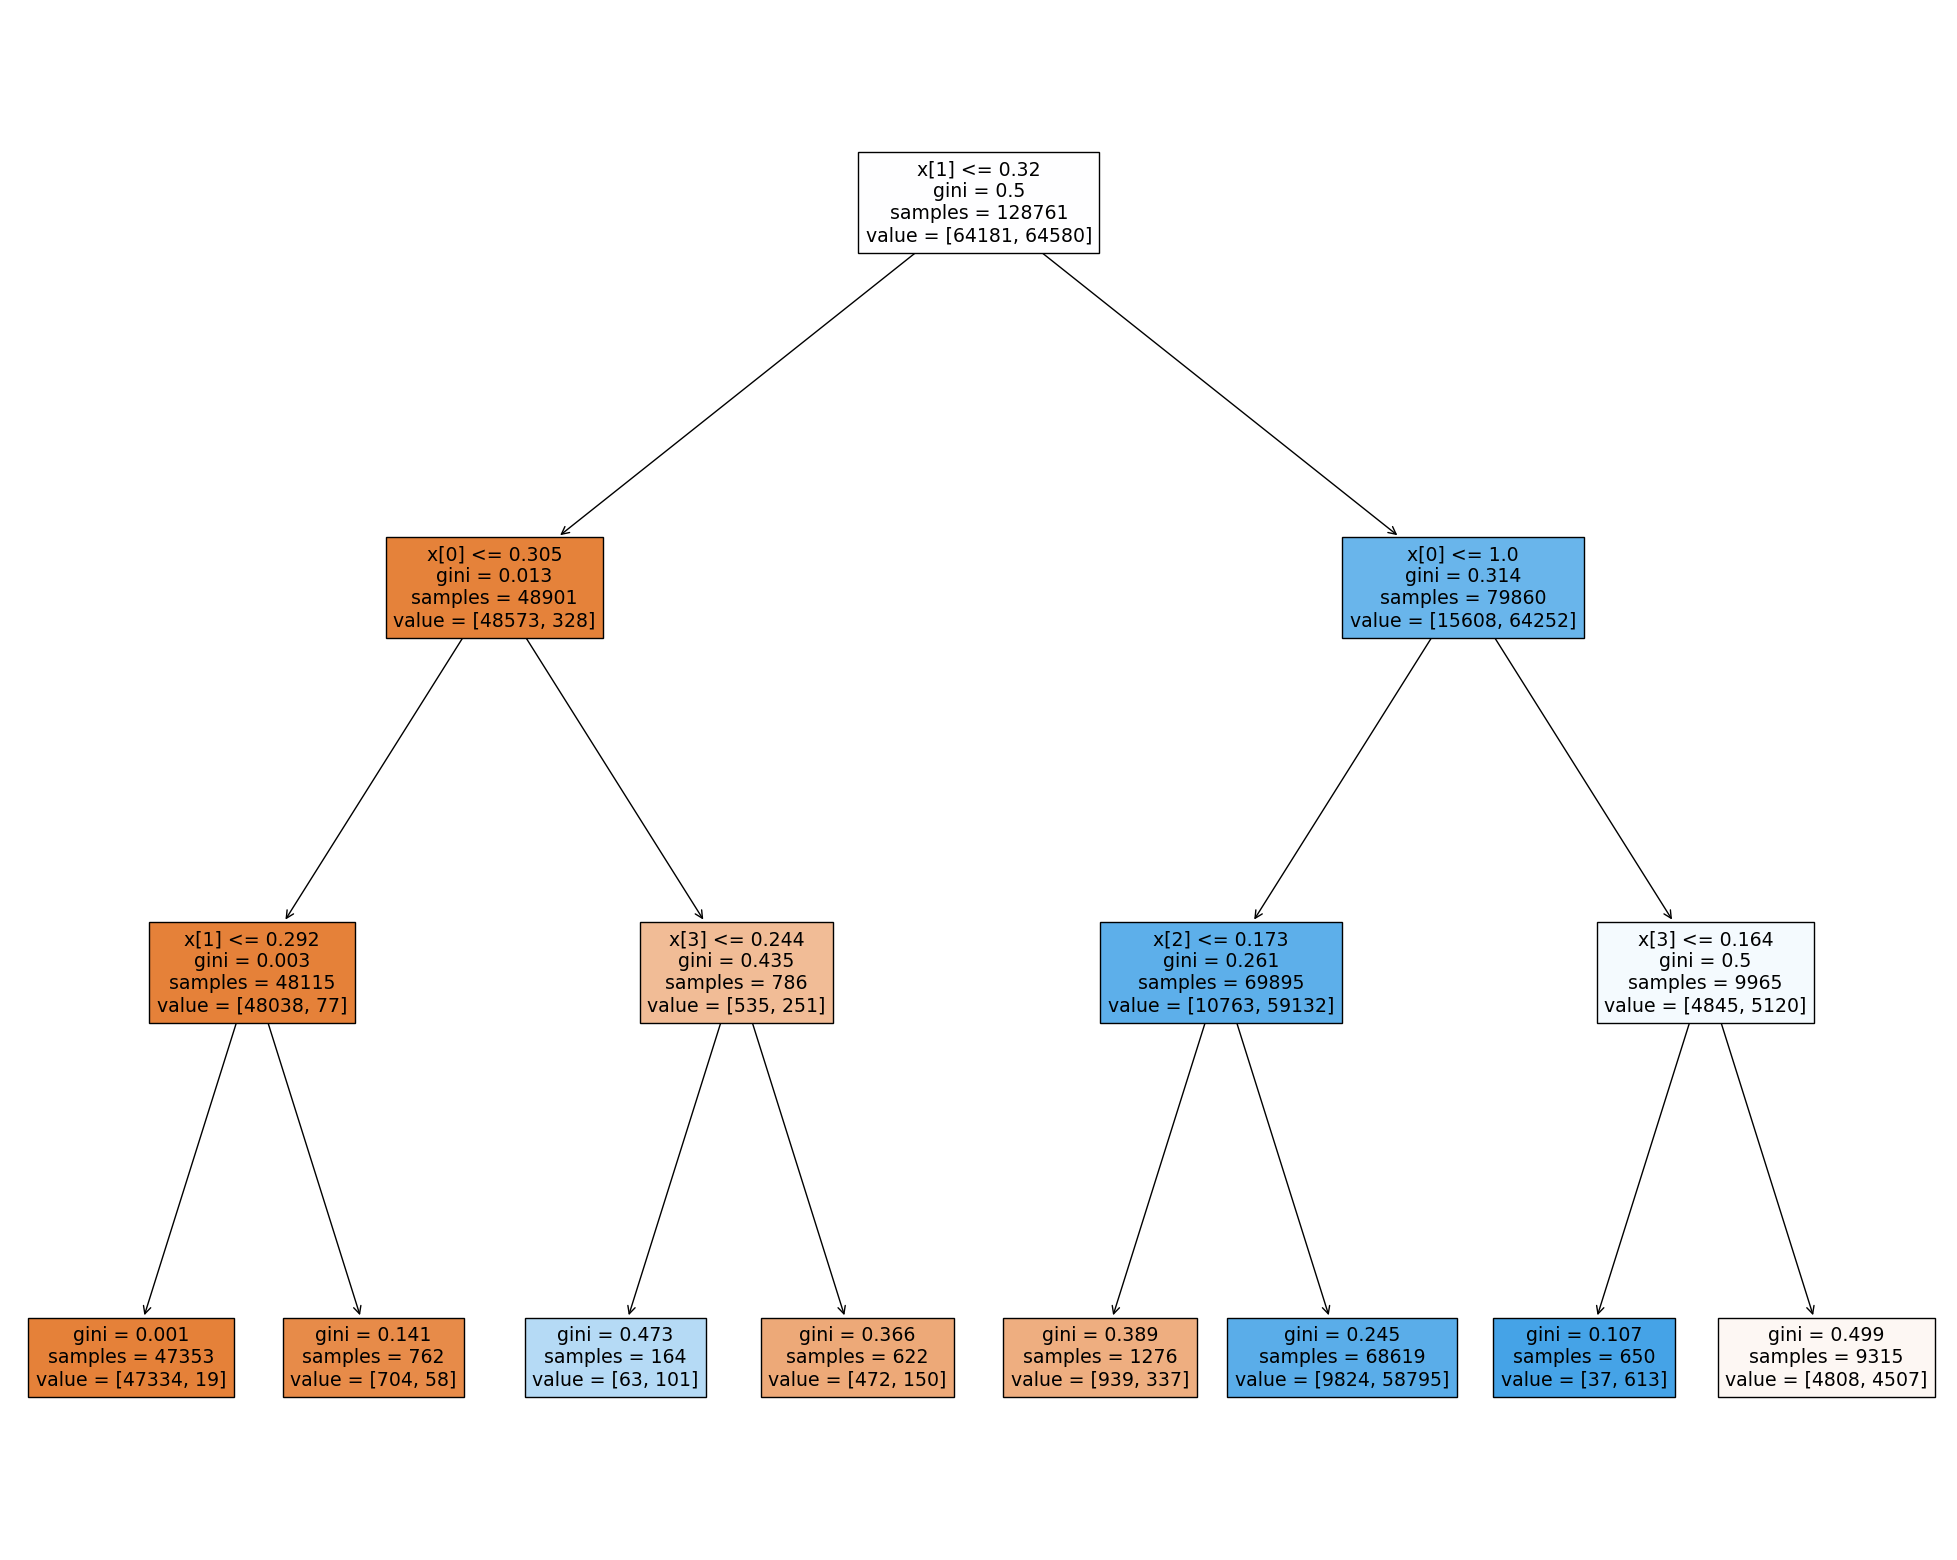

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, filled=True)

In [15]:
models_c['DecisionTreeClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.8826069398279022,
 'Precision': 0.8534507905023044,
 'Recall': 0.9202944136889784,
 'F1-score': 0.885613100463117,
 'ROC_AUC': 0.883068348298923}

In [16]:
from sklearn.metrics import classification_report

print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     16295
           1       0.85      0.92      0.89     15896

    accuracy                           0.88     32191
   macro avg       0.88      0.88      0.88     32191
weighted avg       0.89      0.88      0.88     32191



In [17]:
parameters = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson')}
optimal = GridSearchCV(DecisionTreeRegressor(max_depth=3), parameters).fit(Xr_train, yr_train)
# выводим оптимальные значения параметров
criterion = optimal.best_params_['criterion']

criterion

'squared_error'

In [18]:
DTR = DecisionTreeRegressor(criterion=criterion, max_depth=3).fit(Xr_train, yr_train)
yr_pred = DTR.predict(Xr_test)

print(tree.export_text(DTR))

|--- feature_26 <= 7.50
|   |--- feature_16 <= 18.56
|   |   |--- feature_16 <= 17.28
|   |   |   |--- value: [40.20]
|   |   |--- feature_16 >  17.28
|   |   |   |--- value: [45.90]
|   |--- feature_16 >  18.56
|   |   |--- feature_26 <= 5.50
|   |   |   |--- value: [53.14]
|   |   |--- feature_26 >  5.50
|   |   |   |--- value: [59.80]
|--- feature_26 >  7.50
|   |--- feature_14 <= 22.51
|   |   |--- feature_14 <= 19.74
|   |   |   |--- value: [50.10]
|   |   |--- feature_14 >  19.74
|   |   |   |--- value: [67.15]
|   |--- feature_14 >  22.51
|   |   |--- feature_26 <= 21.50
|   |   |   |--- value: [86.18]
|   |   |--- feature_26 >  21.50
|   |   |   |--- value: [56.64]



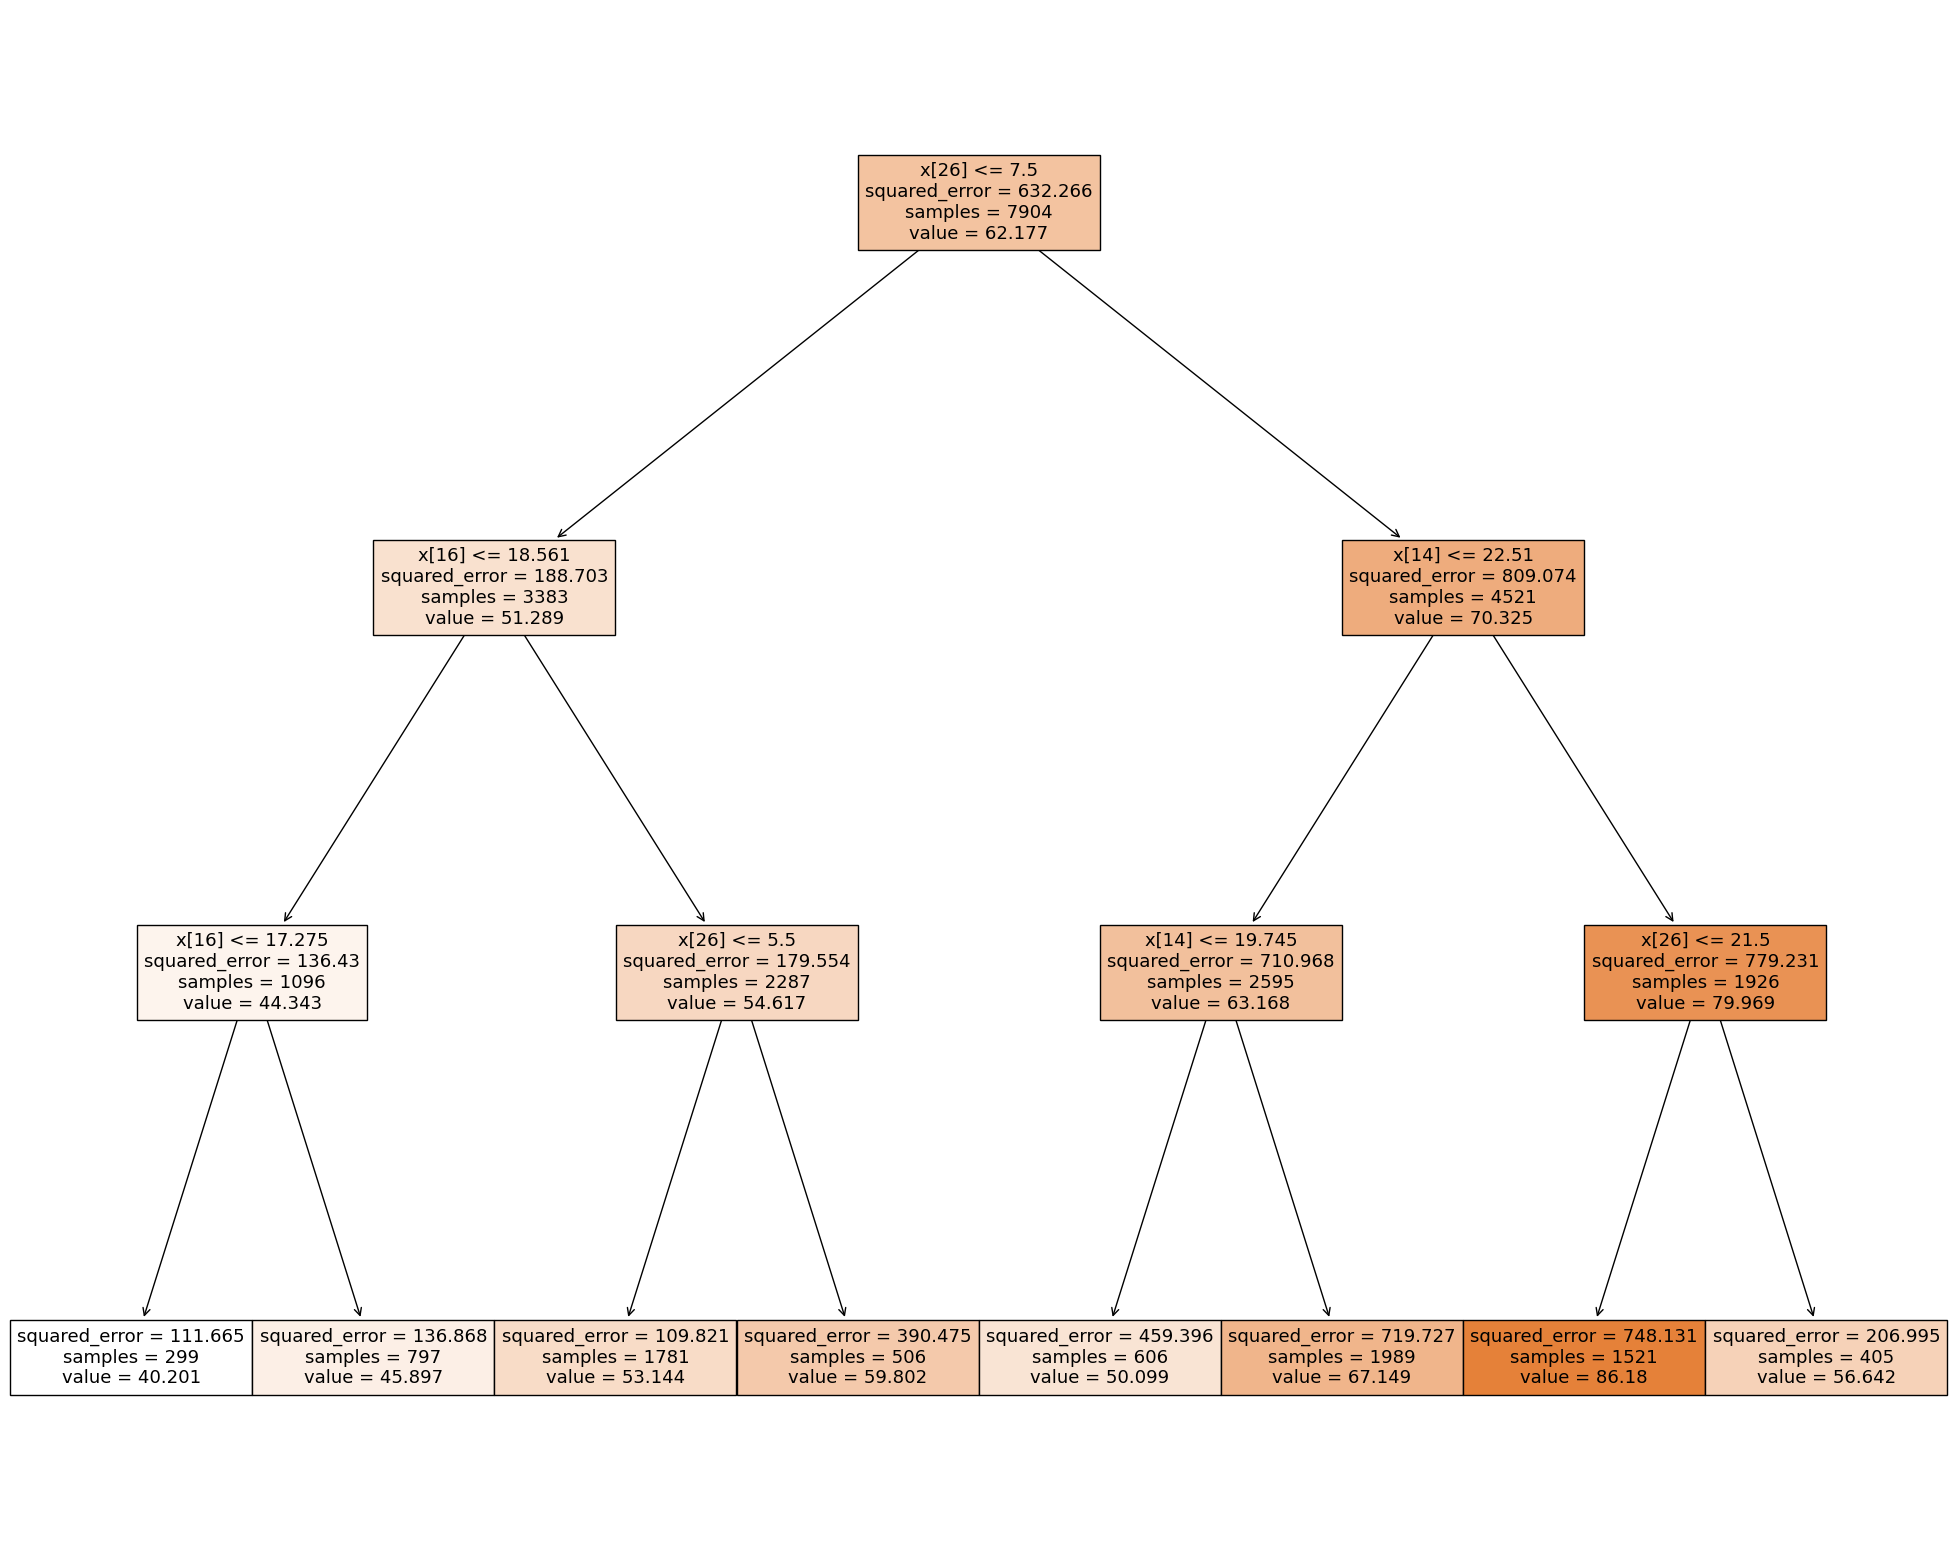

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTR, filled=True)

In [20]:
models_r['DecisionTreeRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 15.149280565963299,
 'MSE': 456.735862188743,
 'RMSE': 21.37137951066199,
 'MAPE': 0.2710279789966566,
 'R^2': 0.3218509763312629}

### B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

In [1]:
from pycaret.classification import models

In [2]:
from pycaret.regression import models


## Задание №2. Применить ансамбли для наборов данных своего варианта:

### BaggingClassifier & BaggingRegressor

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

BC = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(Xc_train, yc_train)
yc_pred = BC.predict(Xc_test)
models_c['BaggingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9041036314497841,
 'Precision': 0.851644429802888,
 'Recall': 0.9757800704579769,
 'F1-score': 0.9094960274414376,
 'ROC_AUC': 0.9049811674781445}

In [23]:
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Poly = Pipeline([('PF', PolynomialFeatures()), ('LR', LinearRegression())]).fit(Xr_train, yr_train)
BR = BaggingRegressor(Poly).fit(Xr_train, yr_train)
yr_pred = BR.predict(Xr_test)
models_r['BaggingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)


{'MAE': 12.851584600807687,
 'MSE': 332.45163007219037,
 'RMSE': 18.23325615659996,
 'MAPE': 0.23427176809982939,
 'R^2': 0.5063848341793453}

### GradientBoostingClassifier & GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier().fit(Xc_train, yc_train)
yc_pred = GBC.predict(Xc_test)
models_c['GradientBoostingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.8931999627225001,
 'Precision': 0.836994157108851,
 'Recall': 0.9732637141419225,
 'F1-score': 0.9000000000000001,
 'ROC_AUC': 0.8941801847788471}

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor().fit(Xr_train, yr_train)
yr_pred = GBR.predict(Xr_test)
models_r['GradientBoostingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 12.560569233966062,
 'MSE': 328.9759590345473,
 'RMSE': 18.13769442444511,
 'MAPE': 0.228230470363691,
 'R^2': 0.5115454162923333}

### StackingClassifier & StackingRegressor

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [('KNC', KNeighborsClassifier()), ('LinearSVC', LinearSVC()), ('DTC', DecisionTreeClassifier(max_depth=3))]
SC = StackingClassifier(estimators=estimators).fit(Xc_train, yc_train)
yc_pred = SC.predict(Xc_test)
models_c['StackingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.p

{'Accuracy': 0.8926097356403964,
 'Precision': 0.842577802258331,
 'Recall': 0.962317564167086,
 'F1-score': 0.8984758156882323,
 'ROC_AUC': 0.8934631699325764}

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [('LR', LinearRegression()), ('Poly', Poly), ('DTR', DecisionTreeRegressor(max_depth=3))]
SR = StackingRegressor(estimators=estimators).fit(Xr_train, yr_train)
yr_pred = SR.predict(Xr_test)
models_r['StackingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 12.72510914303769,
 'MSE': 324.7124938676115,
 'RMSE': 18.01978062762173,
 'MAPE': 0.23200443748952246,
 'R^2': 0.5178756937672568}

### Выполнить оценку качества моделей и выбрать лучшую модель.

In [28]:
from pprint import pprint

pprint(models_c)

best_model(models_c, 'Accuracy')

{'BaggingClassifier': {'Accuracy': 0.9041036314497841,
                       'F1-score': 0.9094960274414376,
                       'Precision': 0.851644429802888,
                       'ROC_AUC': 0.9049811674781445,
                       'Recall': 0.9757800704579769},
 'DecisionTreeClassifier': {'Accuracy': 0.8826069398279022,
                            'F1-score': 0.885613100463117,
                            'Precision': 0.8534507905023044,
                            'ROC_AUC': 0.883068348298923,
                            'Recall': 0.9202944136889784},
 'GradientBoostingClassifier': {'Accuracy': 0.8931999627225001,
                                'F1-score': 0.9000000000000001,
                                'Precision': 0.836994157108851,
                                'ROC_AUC': 0.8941801847788471,
                                'Recall': 0.9732637141419225},
 'StackingClassifier': {'Accuracy': 0.8926097356403964,
                        'F1-score': 0.8984758156882323,


(0.9041036314497841, 'BaggingClassifier')

In [29]:
pprint(models_r)

best_model(models_r, 'R^2')

{'BaggingRegressor': {'MAE': 12.851584600807687,
                      'MAPE': 0.23427176809982939,
                      'MSE': 332.45163007219037,
                      'RMSE': 18.23325615659996,
                      'R^2': 0.5063848341793453},
 'DecisionTreeRegressor': {'MAE': 15.149280565963299,
                           'MAPE': 0.2710279789966566,
                           'MSE': 456.735862188743,
                           'RMSE': 21.37137951066199,
                           'R^2': 0.3218509763312629},
 'GradientBoostingRegressor': {'MAE': 12.560569233966062,
                               'MAPE': 0.228230470363691,
                               'MSE': 328.9759590345473,
                               'RMSE': 18.13769442444511,
                               'R^2': 0.5115454162923333},
 'StackingRegressor': {'MAE': 12.72510914303769,
                       'MAPE': 0.23200443748952246,
                       'MSE': 324.7124938676115,
                       'RMSE': 18.01978062

(0.5178756937672568, 'StackingRegressor')

In [30]:
models_c = {}
models_r = {}

## Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:

### Catboost

In [31]:
from catboost import CatBoostClassifier

CBC = CatBoostClassifier().fit(Xc_train, yc_train)
yc_pred = CBC.predict(Xc_test)
models_c['CatBoostClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

Learning rate set to 0.082
0:	learn: 0.5789998	total: 186ms	remaining: 3m 6s
1:	learn: 0.4979881	total: 213ms	remaining: 1m 46s
2:	learn: 0.4362378	total: 239ms	remaining: 1m 19s
3:	learn: 0.4013923	total: 263ms	remaining: 1m 5s
4:	learn: 0.3750858	total: 287ms	remaining: 57.1s
5:	learn: 0.3524579	total: 313ms	remaining: 51.9s
6:	learn: 0.3385200	total: 339ms	remaining: 48.1s
7:	learn: 0.3164653	total: 364ms	remaining: 45.2s
8:	learn: 0.3030546	total: 397ms	remaining: 43.7s
9:	learn: 0.2949115	total: 426ms	remaining: 42.1s
10:	learn: 0.2885803	total: 452ms	remaining: 40.6s
11:	learn: 0.2846361	total: 471ms	remaining: 38.8s
12:	learn: 0.2791316	total: 490ms	remaining: 37.2s
13:	learn: 0.2760890	total: 509ms	remaining: 35.9s
14:	learn: 0.2707769	total: 529ms	remaining: 34.7s
15:	learn: 0.2682663	total: 552ms	remaining: 33.9s
16:	learn: 0.2650151	total: 573ms	remaining: 33.1s
17:	learn: 0.2625338	total: 592ms	remaining: 32.3s
18:	learn: 0.2610717	total: 611ms	remaining: 31.6s
19:	learn: 0

{'Accuracy': 0.9232083501599826,
 'Precision': 0.9124370160992995,
 'Recall': 0.9341343734272773,
 'F1-score': 0.9231582219459125,
 'ROC_AUC': 0.923342117674056}

In [32]:
from catboost import CatBoostRegressor

CBR = CatBoostRegressor().fit(Xr_train, yr_train)
yr_pred = CBR.predict(Xr_test)
models_r['CatBoostRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

Learning rate set to 0.05676
0:	learn: 24.6655503	total: 8.09ms	remaining: 8.08s
1:	learn: 24.2620286	total: 14.7ms	remaining: 7.34s
2:	learn: 23.8780937	total: 21.8ms	remaining: 7.23s
3:	learn: 23.5148497	total: 28ms	remaining: 6.97s
4:	learn: 23.1532081	total: 35.5ms	remaining: 7.06s
5:	learn: 22.8465552	total: 41.9ms	remaining: 6.95s
6:	learn: 22.5732317	total: 48.9ms	remaining: 6.93s
7:	learn: 22.2938817	total: 59.5ms	remaining: 7.38s
8:	learn: 22.0432352	total: 66.5ms	remaining: 7.32s
9:	learn: 21.8128011	total: 72.3ms	remaining: 7.15s
10:	learn: 21.6036913	total: 78.4ms	remaining: 7.05s
11:	learn: 21.4037148	total: 91.4ms	remaining: 7.53s
12:	learn: 21.2045665	total: 103ms	remaining: 7.81s
13:	learn: 21.0583258	total: 117ms	remaining: 8.24s
14:	learn: 20.8901534	total: 122ms	remaining: 8.03s
15:	learn: 20.7419268	total: 128ms	remaining: 7.87s
16:	learn: 20.5920855	total: 134ms	remaining: 7.75s
17:	learn: 20.4347858	total: 143ms	remaining: 7.81s
18:	learn: 20.3255179	total: 150ms	

{'MAE': 10.6894799343139,
 'MSE': 246.5287921315938,
 'RMSE': 15.701235369600502,
 'MAPE': 0.19541577839967708,
 'R^2': 0.6339607341339314}

### XGBoost

In [33]:
from xgboost import XGBClassifier

XGBC = XGBClassifier().fit(Xc_train, yc_train)
yc_pred = XGBC.predict(Xc_test)
models_c['XGBClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9297629772296605,
 'Precision': 0.9184312281347818,
 'Recall': 0.9413688978359336,
 'F1-score': 0.9297586131908415,
 'ROC_AUC': 0.9299050687399981}

In [34]:
from xgboost import XGBRegressor

XGBR = XGBRegressor().fit(Xr_train, yr_train)
yr_pred = XGBR.predict(Xr_test)
models_r['XGBRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 10.714263119678266,
 'MSE': 251.1081121765053,
 'RMSE': 15.84639114046177,
 'MAPE': 0.19375538673225703,
 'R^2': 0.6271614839006749}

### LightGBM

In [35]:
import lightgbm as lgb

LGBC = lgb.LGBMClassifier().fit(Xc_train, yc_train)
yc_pred = LGBC.predict(Xc_test)
models_c['LGBClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

[LightGBM] [Info] Number of positive: 64580, number of negative: 64181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 128761, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501549 -> initscore=0.006198
[LightGBM] [Info] Start training from score 0.006198


{'Accuracy': 0.9165605293404989,
 'Precision': 0.8932952244849351,
 'Recall': 0.9437594363361852,
 'F1-score': 0.9178342000611809,
 'ROC_AUC': 0.9168935260846314}

In [36]:
LGBR = lgb.LGBMRegressor().fit(Xr_train, yr_train)
yr_pred = LGBR.predict(Xr_test)
models_r['LGBRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5804
[LightGBM] [Info] Number of data points in the train set: 7904, number of used features: 28
[LightGBM] [Info] Start training from score 62.177379


{'MAE': 10.691523179110234,
 'MSE': 247.10103917583655,
 'RMSE': 15.719447801237694,
 'MAPE': 0.1966246494505276,
 'R^2': 0.6331110772392641}

### Выполнить оценку качества моделей и выбрать лучшую модель.

In [37]:
pprint(models_c)

best_model(models_c, 'Accuracy')

{'CatBoostClassifier': {'Accuracy': 0.9232083501599826,
                        'F1-score': 0.9231582219459125,
                        'Precision': 0.9124370160992995,
                        'ROC_AUC': 0.923342117674056,
                        'Recall': 0.9341343734272773},
 'LGBClassifier': {'Accuracy': 0.9165605293404989,
                   'F1-score': 0.9178342000611809,
                   'Precision': 0.8932952244849351,
                   'ROC_AUC': 0.9168935260846314,
                   'Recall': 0.9437594363361852},
 'XGBClassifier': {'Accuracy': 0.9297629772296605,
                   'F1-score': 0.9297586131908415,
                   'Precision': 0.9184312281347818,
                   'ROC_AUC': 0.9299050687399981,
                   'Recall': 0.9413688978359336}}


(0.9297629772296605, 'XGBClassifier')

In [38]:
pprint(models_r)

best_model(models_r, 'R^2')

{'CatBoostRegressor': {'MAE': 10.6894799343139,
                       'MAPE': 0.19541577839967708,
                       'MSE': 246.5287921315938,
                       'RMSE': 15.701235369600502,
                       'R^2': 0.6339607341339314},
 'LGBRegressor': {'MAE': 10.691523179110234,
                  'MAPE': 0.1966246494505276,
                  'MSE': 247.10103917583655,
                  'RMSE': 15.719447801237694,
                  'R^2': 0.6331110772392641},
 'XGBRegressor': {'MAE': 10.714263119678266,
                  'MAPE': 0.19375538673225703,
                  'MSE': 251.1081121765053,
                  'RMSE': 15.84639114046177,
                  'R^2': 0.6271614839006749}}


(0.6339607341339314, 'CatBoostRegressor')